In [1]:
# exp7-scale-s-experiment_plot_only.py

import commons
import re
import statistics
import subprocess
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mb_of_data = 131072

exp7-scale-s-experiment_plot_only.py


In [2]:
filename = "../data/scale-s-output.csv"

r_sizes_names = [
        '$R_{size}$ < L2',
        'L2 < $R_{size}$ < L3',
        'L3 < $R_{size}$ < EPC',
        'EPC < $R_{size}$'
    ]
csvf = open(filename, mode='r')
csvr = csv.DictReader(csvf)
all_data = list(csvr)
r_sizes = sorted(set(map(lambda x:float(x['sizeR']), all_data)))
s_sizes = sorted(set(map(lambda x:float(x['sizeS']), all_data)))
algos = sorted(set(map(lambda x:x['alg'], all_data)))

(0.0, 209.6)

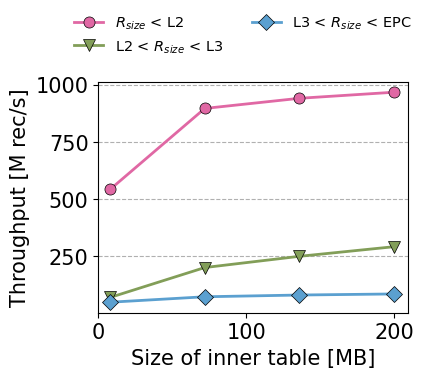

In [5]:
# print only CHTopt
# exp7-scale-s-experiment_plot_only.py
# plt.clf()
fig = plt.figure(figsize=(4,3))
data = list(filter(lambda x: x['alg'] == 'CHTopt', all_data))
data_splitted = [[y for y in data if y['sizeR'] == str(x)] for x in r_sizes]
markers = ['o', 'v', 'D', 's']
for i in range(0, len(r_sizes)-1):
    x_sizes = list(filter(lambda x: x['alg'] == 'CHTopt', all_data))
    x_sizes = sorted(set(map(lambda x:float(x['sizeS']), x_sizes)))
    y = list(map(lambda x: float(x['throughput']), data_splitted[i]))
    plt.plot(x_sizes, y,
                 label=r_sizes_names[i], color=commons.color_size(i), linewidth=2,
                 marker=markers[i], markersize=8, markeredgecolor='black',
                 markeredgewidth=0.5)
# plt.legend(fontsize='x-small')
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, fontsize='x-small', frameon=0,
               ncol=2, bbox_to_anchor = (0.05, 0.95), loc='lower left', borderaxespad=0)
plt.gca().yaxis.grid(linestyle='dashed')
plt.xlabel('Size of inner table [MB]')
plt.ylabel('Throughput [M rec/s]')
# plt.title('CHT', y=-0.35)
plt.xlim(left=0)
    # plt.ylim(bottom=0)
#commons.savefig('../img/scale-s-CHTopt.png')

In [ ]:
# exp7-scale-s-experiment_plot_only.py

# plt.clf()
fig = plt.figure(figsize=(4,3))
data = list(filter(lambda x: x['alg'] == 'CHT', all_data))
data_splitted = [[y for y in data if y['sizeR'] == str(x)] for x in r_sizes]
markers = ['o', 'v', 'D', 's']
for i in range(0, len(r_sizes)):
    x_sizes = list(filter(lambda x: x['alg'] == 'CHT', all_data))
    x_sizes = sorted(set(map(lambda x:float(x['sizeS']), x_sizes)))
    y = list(map(lambda x: float(x['throughput']), data_splitted[i]))
    plt.plot(x_sizes, y,
                 label=r_sizes_names[i], color=commons.color_size(i), linewidth=2,
                 marker=markers[i], markersize=8, markeredgecolor='black',
                 markeredgewidth=0.5)
    # plt.legend(fontsize='x-small')
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels, fontsize='x-small', frameon=0,
               ncol=2, bbox_to_anchor = (0.05, 0.95), loc='lower left', borderaxespad=0)
    plt.gca().yaxis.grid(linestyle='dashed')
    plt.xlabel('Size of inner table [MB]')
    plt.ylabel('Throughput [M rec/s]')
    # plt.title('CHT', y=-0.35)
    # plt.xlim(left=0)
    # plt.ylim(bottom=0)
commons.savefig('../img/scale-s-CHT.png')

Different experiment: NL

In [4]:
# exp7-scale_tuples-experiment_nl_plot_only.py
filename = "../data/NL-output.csv"
mb_of_data = 131072

csvf = pd.read_csv(filename)
csvf_native = csvf.loc[csvf['mode'] == 'native']
csvf_sgx = csvf.loc[csvf['mode'] == 'sgx']

csvf_native["total_size"] = csvf_native["sizeR"] + csvf_native["sizeS"]
csvf_native

/tmp/ipykernel_24624/1311122392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csvf_native["total_size"] = csvf_native["sizeR"] + csvf_native["sizeS"]


,mode,alg,threads,sizeR,sizeS,total_join_time,throughput,total_size
0,native,NL,4,0.04,0.16,0.03,0.0,0.2
1,native,NL_keys,4,0.04,0.16,0.07,0.0,0.2
2,native,NL_tuples,4,0.04,0.16,0.01,0.0,0.2
3,native,NL,4,1.00,4.00,17.50,0.0,5.0
4,native,NL_keys,4,1.00,4.00,16.61,0.0,5.0
5,native,NL_tuples,4,1.00,4.00,12.94,0.0,5.0
6,native,NL,4,2.00,8.00,73.38,0.0,10.0
7,native,NL_keys,4,2.00,8.00,70.76,0.0,10.0
8,native,NL_tuples,4,2.00,8.00,53.25,0.0,10.0
9,native,NL,4,4.00,16.00,398.59,0.0,20.0


In [5]:
x_numtuples = csvf_native.loc[csvf_native['alg'] == 'NL']["sizeR"] + csvf_native.loc[csvf_native['alg'] == 'NL']["sizeS"]
x_numtuples = x_numtuples.reset_index(drop=True).astype('str')
x_numtuples

0     0.2
1     5.0
2    10.0
3    20.0
dtype: object

In [ ]:
y_native = {}
for alg in csvf_native['alg'].unique():
    y_native[alg] = ( csvf_native.loc[csvf_native['alg'] == alg]["total_join_time"].reset_index(drop=True).to_list() )

y_native

{'NL': [0.03, 17.5, 73.38, 398.59],
 'NL_keys': [0.07, 16.61, 70.76, 382.63],
 'NL_tuples': [0.01, 12.94, 53.25, 313.45]}

In [16]:
y_sgx = {}
for alg in csvf_sgx['alg'].unique():
    y_sgx[alg] = ( csvf_sgx.loc[csvf_sgx['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_sgx

{'NL': [1.5396, 0.149, 0.0711, 0.0264],
 'NL_keys': [1.5746, 0.1557, 0.0752, 0.0274],
 'NL_tuples': [1.8421, 0.22, 0.1018, 0.0326]}

In [9]:
y_native2 = pd.DataFrame(y_native)
y_native2

,NL,NL_keys,NL_tuples
0,0.03,0.07,0.01
1,17.50,16.61,12.94
2,73.38,70.76,53.25
3,398.59,382.63,313.45


In [18]:
y_sgx2 = pd.DataFrame(y_sgx)
y_sgx2

,NL,NL_keys,NL_tuples
0,1.5396,1.5746,1.8421
1,0.1490,0.1557,0.2200
2,0.0711,0.0752,0.1018
3,0.0264,0.0274,0.0326


Saved image file: ../img/NL-output_native.png


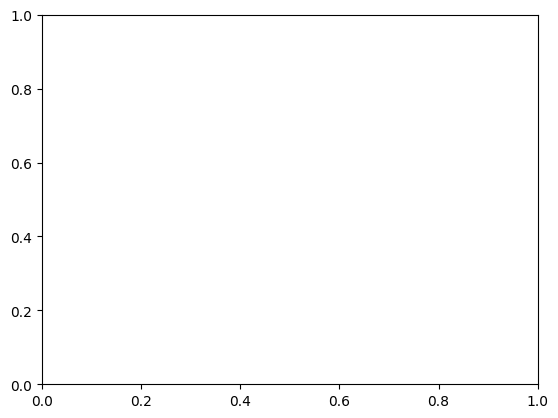

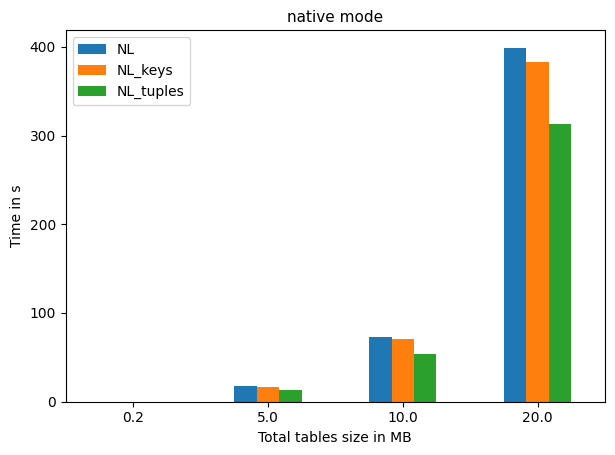

In [10]:
#Simpler code
fig, ax = plt.subplots(1,1)
alg_cat = csvf_native['alg'].unique()
x =np.arange( 0,4 )

ax = y_native2.plot(kind = "bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Time in s")
ax.set_title("native mode",fontsize = 11)

commons.savefig('../img/NL-output_native.png')

In [ ]:
y_native_throughput = y_native2.copy()
mb_of_data = 131072
sizes = [0.2*mb_of_data,5*mb_of_data,10*mb_of_data,20*mb_of_data]
#y_native_add_cycle.loc[:,0] = y_native_add[:,0] / sizes[0]
for i in range(len(sizes)):  
    y_native_throughput.loc[i,:] = sizes[i] / 1000000 / y_native_throughput.loc[i,:] 
y_native_throughput

,NL,NL_keys,NL_tuples
0,0.873813,0.374491,2.621440
1,0.037449,0.039456,0.050646
2,0.017862,0.018523,0.024614
3,0.006577,0.006851,0.008363


Text(0, 0.5, 'Throughput in M rec/s')

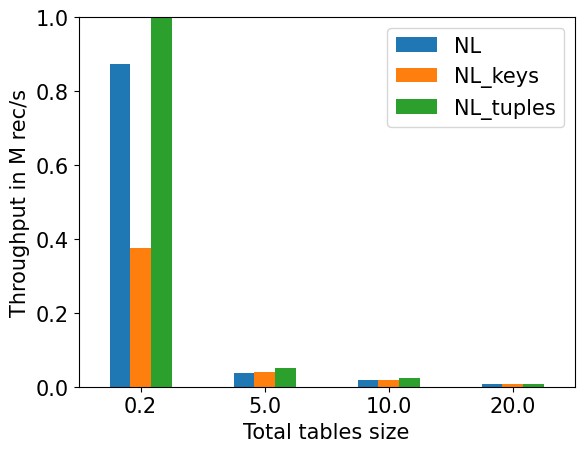

In [ ]:
x =np.arange( 0,len(x_numtuples) )

ax = y_native_throughput.plot(kind="bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_ylim([0,1])
ax.set_xlabel("Total tables size",)
ax.set_ylabel("Throughput in M rec/s")

NameError: name 'y_sgx2' is not defined

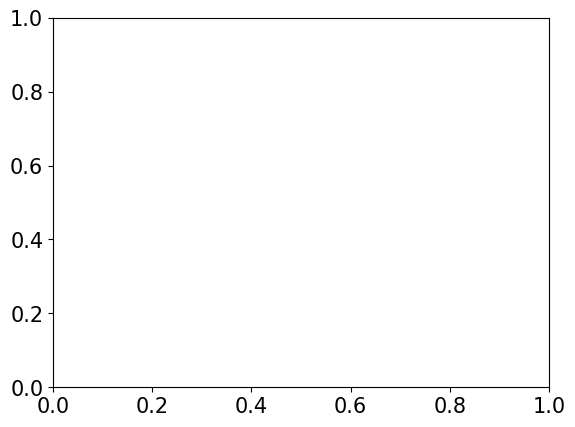

In [ ]:
#Simpler code
fig, ax = plt.subplots(1,1)
alg_cat = csvf_sgx['alg'].unique()
x =np.arange( 0,4 )

ax = y_sgx2.plot(kind = "bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB")
ax.set_ylabel("Throughput in M rec/s")
ax.set_title("SGX mode",fontsize = 11)

commons.savefig('../img/NL-output_sgx.png')

In [ ]:
#Based very strongly on https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
#TO DO: To be changed 
fig, ax = plt.subplots()
alg_cat = csvf_native['alg'].unique()
x =np.arange( 0,4 )
#plt.xticks(x, x_native)
#plt.bar(x, y_native['NL'],y_native['NL_keys']  )

width = 0.25  # the width of the bars
multiplier = 0

for item, values in y_native.items():
    offset = width * multiplier
    print(item,values)
    p = ax.bar(x + offset, values, width, label =item)
    multiplier += 1
    #ax.bar_label(p, padding=3)
ax.legend(alg_cat)
ax.set_xticks(x+width, x_numtuples)
ax.set_xlabel("Total tables size in MB")
ax.set_ylabel("Time in s")
ax.set_title("native mode")
commons.savefig('../img/NL-output_native.png')

In [ ]:
#Based very strongly on https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

fig, ax = plt.subplots()
alg_cat = csvf_sgx['alg'].unique()
x =np.arange( 0,4 )
#plt.xticks(x, x_native)
#plt.bar(x, y_native['NL'],y_native['NL_keys']  )

width = 0.25  # the width of the bars
multiplier = 0

for item, values in y_sgx.items():
    offset = width * multiplier
    print(item,values)
    p = ax.bar(x + offset, values, width, label =item)
    multiplier += 1
    #ax.bar_label(p, padding=3)
ax.legend(alg_cat)
ax.set_xticks(x+width, x_numtuples)
ax.set_xlabel("Total tables size in MB")
ax.set_ylabel("Throughput in Mrec/s")
ax.set_title("sgx mode")
commons.savefig('../img/NL-output_sgx.png')

CHT_versions_plot:

In [38]:
filename_more_r = "../data/CHT_versions_more_r.csv"
filename_more_s = "../data/CHT_versions_more_s.csv"

In [51]:
csvf = pd.read_csv(filename_more_r)
csvf_native = csvf.loc[csvf['mode'] == 'native']
csvf_sgx = csvf.loc[csvf['mode'] == 'sgx']
csvf_native["total_size"] = csvf_native["sizeR"] + csvf_native["sizeS"]

x_numtuples = csvf_native.loc[csvf_native['alg'] == 'CHT']["sizeR"] + csvf_native.loc[csvf_native['alg'] == 'CHT']["sizeS"]
x_numtuples = x_numtuples.reset_index(drop=True)

/tmp/ipykernel_49796/3406143944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csvf_native["total_size"] = csvf_native["sizeR"] + csvf_native["sizeS"]


In [39]:
x_numtuples

0     50.0
1    100.0
2    150.0
3    200.0
4    250.0
5    300.0
6    350.0
dtype: float64

In [40]:
csvf_native.sort_values(by="throughput",ascending=False)

,mode,alg,threads,sizeR,sizeS,throughput,total_size
1,native,CHTPr1,2,10.0,40.0,111.57,50.0
2,native,CHTPr2,2,10.0,40.0,104.34,50.0
0,native,CHT,2,10.0,40.0,101.49,50.0
4,native,CHTPr1,2,20.0,80.0,50.77,100.0
5,native,CHTPr2,2,20.0,80.0,49.54,100.0
3,native,CHT,2,20.0,80.0,49.46,100.0
7,native,CHTPr1,2,30.0,120.0,37.31,150.0
8,native,CHTPr2,2,30.0,120.0,36.88,150.0
6,native,CHT,2,30.0,120.0,36.64,150.0
10,native,CHTPr1,2,40.0,160.0,33.16,200.0


In [52]:
#Get the throughput in native mode
y_native = {}
for alg in csvf_native['alg'].unique():
    y_native[alg] = ( csvf_native.loc[csvf_native['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_native = pd.DataFrame(y_native)

In [54]:
#Get the throughput in SGX mode
y_sgx = {}
for alg in csvf_sgx['alg'].unique():
    y_sgx[alg] = ( csvf_sgx.loc[csvf_sgx['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_sgx = pd.DataFrame(y_sgx)

Text(0.5, 1.0, 'native mode (R:S = 4:1)')

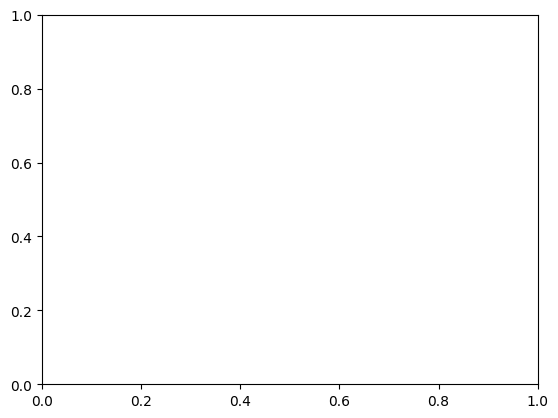

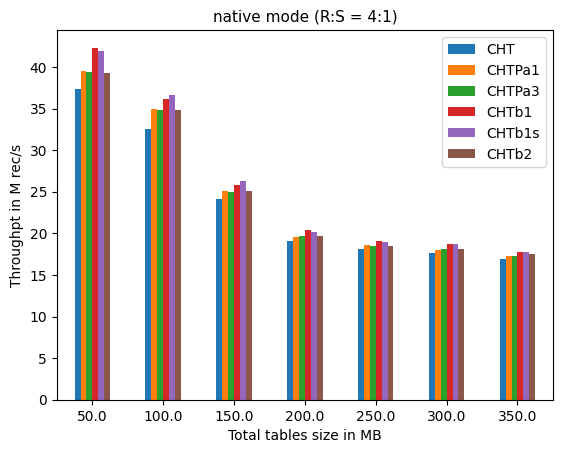

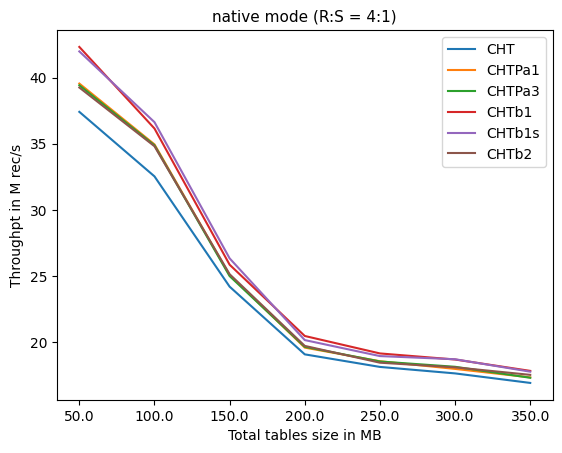

In [55]:
#Plot the native mode
fig, ax = plt.subplots(1,1)
alg_cat = csvf_native['alg'].unique()
x =np.arange( 0,len(x_numtuples) )

ax = y_native.plot(kind="bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Throughpt in M rec/s")
ax.set_title("native mode (R:S = 4:1)",fontsize = 11)
#commons.savefig('../img/NL-output_native_bar.png')
ax = y_native.plot()
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Throughpt in M rec/s")
ax.set_title("native mode (R:S = 4:1)",fontsize = 11)
#commons.savefig('../img/NL-output_native_line.png')

Text(0.5, 1.0, 'SGX mode (R:S = 4:1)')

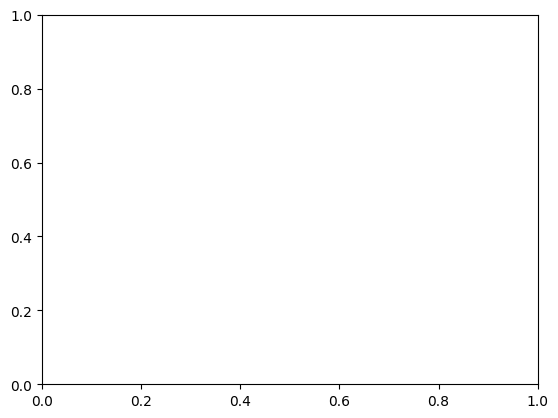

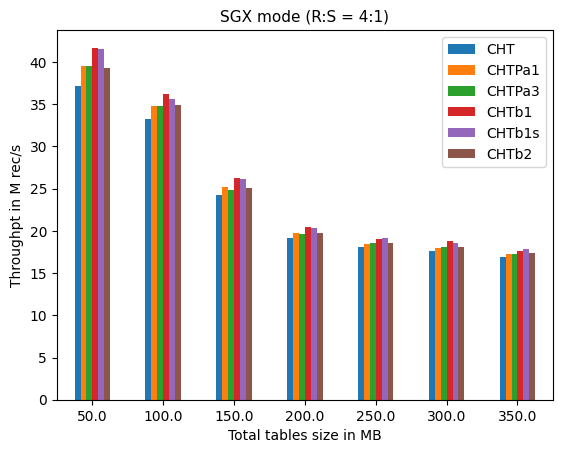

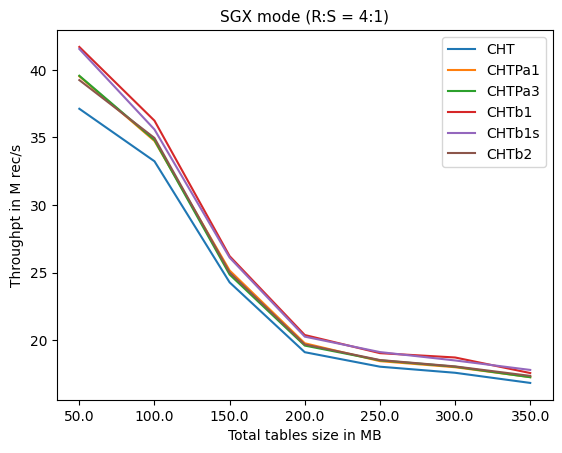

In [59]:
#Plot the native mode
fig, ax = plt.subplots(1,1)
alg_cat = csvf_sgx['alg'].unique()
x =np.arange( 0,len(x_numtuples) )

ax = y_sgx.plot(kind="bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Throughpt in M rec/s")
ax.set_title("SGX mode (R:S = 4:1)",fontsize = 11)
#commons.savefig('../img/NL-output_native_bar.png')

ax = y_sgx.plot()
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Throughpt in M rec/s")
ax.set_title("SGX mode (R:S = 4:1)",fontsize = 11)
#commons.savefig('../img/NL-output_native_line.png')

In [60]:
csvf = pd.read_csv(filename_more_s)
csvf_native = csvf.loc[csvf['mode'] == 'native']
csvf_sgx = csvf.loc[csvf['mode'] == 'sgx']
csvf_native["total_size"] = csvf_native["sizeR"] + csvf_native["sizeS"]

#x_numtuples = csvf_native.loc[csvf_native['alg'] == 'CHT']["sizeR"] + csvf_native.loc[csvf_native['alg'] == 'CHT']["sizeS"]
#x_numtuples = x_numtuples.reset_index(drop=True)

/tmp/ipykernel_49796/3548160194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csvf_native["total_size"] = csvf_native["sizeR"] + csvf_native["sizeS"]


In [72]:
#Get the throughput in native mode
y_native = {}
for alg in csvf_native['alg'].unique():
    y_native[alg] = ( csvf_native.loc[csvf_native['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_native = pd.DataFrame(y_native)
y_native

,CHT,CHTPr1,CHTPr2
0,101.49,111.57,104.34
1,49.46,50.77,49.54
2,36.64,37.31,36.88
3,32.51,33.16,32.89
4,30.61,31.15,30.98
5,29.49,29.92,29.64
6,28.61,28.97,28.93


In [68]:
#Get the throughput in SGX mode
y_sgx = {}
for alg in csvf_sgx['alg'].unique():
    y_sgx[alg] = ( csvf_sgx.loc[csvf_sgx['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_sgx = pd.DataFrame(y_sgx)

In [69]:
y_sgx

,CHT,CHTPr1,CHTPr2
0,102.71,110.80,103.29
1,49.20,50.60,49.76
2,36.75,37.35,37.02
3,32.55,33.04,32.76
4,30.69,31.16,30.76
5,29.43,29.88,29.64
6,28.56,28.96,28.87


Text(0.5, 1.0, 'native mode (R:S = 1:4)')

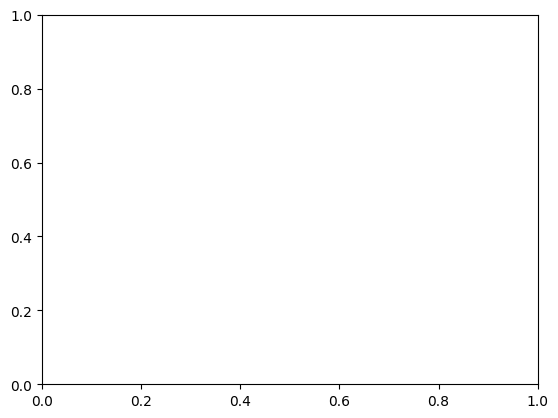

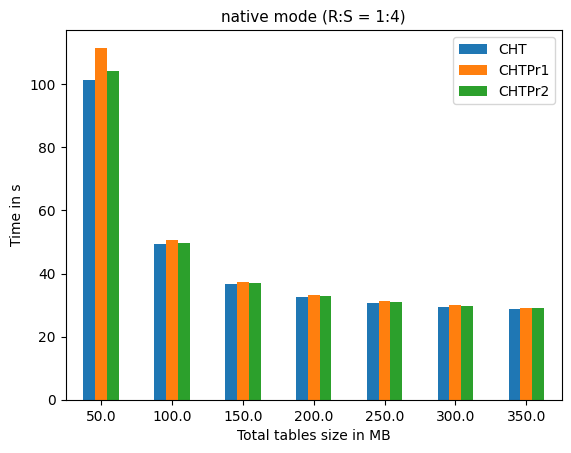

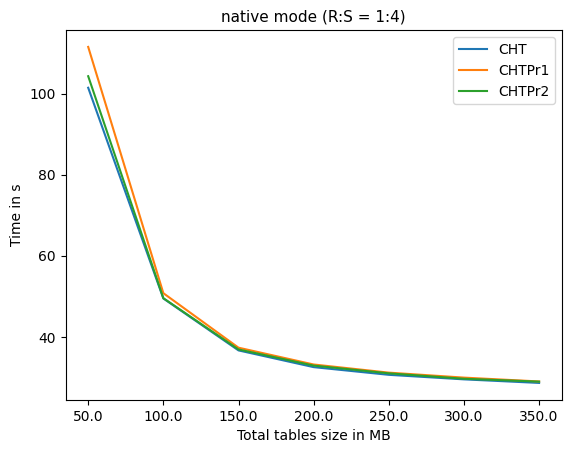

In [63]:
#Plot the native mode
fig, ax = plt.subplots(1,1)
alg_cat = csvf_native['alg'].unique()
x =np.arange( 0,len(x_numtuples) )

ax = y_native.plot(kind="bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Time in s")
ax.set_title("native mode (R:S = 1:4)",fontsize = 11)
#commons.savefig('../img/NL-output_native_bar.png')
ax = y_native.plot()
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Time in s")
ax.set_title("native mode (R:S = 1:4)",fontsize = 11)
#commons.savefig('../img/NL-output_native_line.png')

Text(0.5, 1.0, 'SGX mode (R:S = 4:1)')

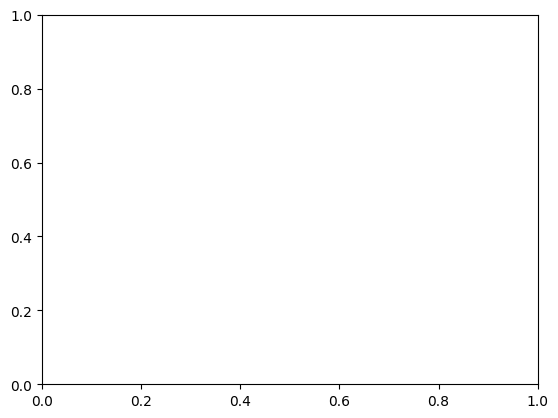

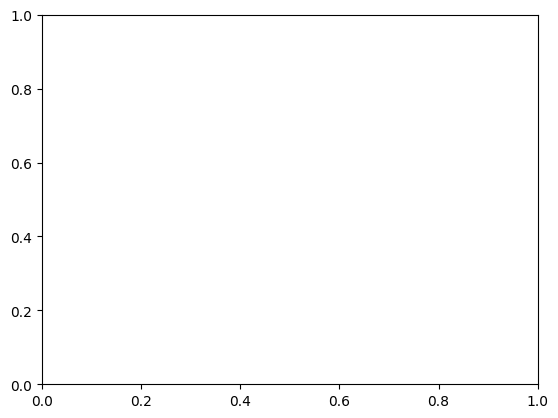

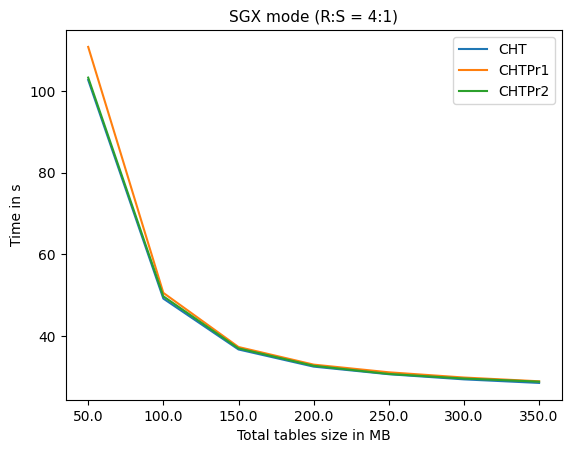

In [71]:
#Plot the sgx mode
fig, ax = plt.subplots(1,1)
alg_cat = csvf_sgx['alg'].unique()
x =np.arange( 0,len(x_numtuples) )
ax = y_sgx.plot(kind="bar")
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Time in s")
ax.set_title("SGX mode (R:S = 1:4)",fontsize = 11)
#commons.savefig('../img/NL-output_native_bar.png')
ax.clear()
ax = y_sgx.plot()
ax.legend(alg_cat)
ax.set_xticks(x, x_numtuples, rotation = 0)
ax.set_xlabel("Total tables size in MB",)
ax.set_ylabel("Time in s")
ax.set_title("SGX mode (R:S = 1:4)",fontsize = 11)
#commons.savefig('../img/NL-output_native_line.png')

In [2]:
fname_phases = "../data/phases-runtime-output.csv"


In [3]:
csvf = pd.read_csv(fname_phases)
csvf

,mode,alg,ds,phase,cycles
0,sgx,CHT,cache-fit,Total,2.209950e+08
1,sgx,CHT,cache-fit,Partition,8.744195e+07
2,sgx,CHT,cache-fit,Join,1.335105e+08
3,sgx,CHT,cache-fit,Build,3.952166e+07
4,sgx,CHT,cache-fit,Probe,9.398889e+07
5,sgx,CHTopt,cache-fit,Total,1.900407e+08
6,sgx,CHTopt,cache-fit,Partition,8.281993e+07
7,sgx,CHTopt,cache-fit,Join,1.071786e+08
8,sgx,CHTopt,cache-fit,Build,2.534186e+07
9,sgx,CHTopt,cache-fit,Probe,8.183672e+07


In [12]:
phases = ["Partition","Build","Probe"]
csvf_cht = csvf.loc[csvf['alg'] == 'CHT' & ( csvf['phase'] == "Partition")]
csvf_cht


TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]

In [4]:
phases = ["Partition","Build","Probe"]

In [19]:
csvf_cht.plot(x='alg',y= kind=,"bar",stacked=True)

KeyError: "None of [Index(['Partition', 'Build', 'Probe'], dtype='object')] are in the [columns]"

In [ ]:
y_native = {}
        # There are a lot of CHTversions. Please don't choose all for better readibility.
        for phase in phases:
            y_native[alg] = ( csvf_native.loc[csvf_native['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
        y_native = pd.DataFrame(y_native)

In [20]:
fname_phases = "../data/phases-runtime-output.csv"


plot_fname = "../img/Figure-07-CPU-cycles-per-tuple"
csvf = open(fname_phases, mode='r')
csvr = csv.DictReader(csvf)
all_data = list(csvr)
algos = sorted(set(map(lambda x:x['alg'], all_data)))
modes = sorted(set(map(lambda x:x['mode'], all_data)))
all_data = list(filter(lambda x:x['phase'] != "Total", all_data))

In [21]:
all_data

[{'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '87441947.2'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Join',
  'cycles': '133510546.8'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Build',
  'cycles': '39521658'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Probe',
  'cycles': '93988888.8'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '82819928'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Join',
  'cycles': '107178581.6'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Build',
  'cycles': '25341858.4'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Probe',
  'cycles': '81836723.2'},
 {'mode': 'sgx',
  'alg': 'RHT',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '528339878.8'},
 {'mode': 'sgx',
  'alg': 'RHT',
  'ds': 'cache-fit',
  'phase': 'Join

In [32]:
list(filter(lambda x: ( x['alg'] != "CHT") and (x['phase'] == "Join"), all_data))

[{'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Join',
  'cycles': '107178581.6'},
 {'mode': 'sgx',
  'alg': 'RHT',
  'ds': 'cache-fit',
  'phase': 'Join',
  'cycles': '116129491.2'},
 {'mode': 'sgx',
  'alg': 'PRHO_avx',
  'ds': 'cache-fit',
  'phase': 'Join',
  'cycles': '70785792.8'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-exceed',
  'phase': 'Join',
  'cycles': '7616290560'},
 {'mode': 'sgx',
  'alg': 'RHT',
  'ds': 'cache-exceed',
  'phase': 'Join',
  'cycles': '1219170743.6'},
 {'mode': 'sgx',
  'alg': 'PRHO_avx',
  'ds': 'cache-exceed',
  'phase': 'Join',
  'cycles': '813938210'}]

In [33]:
list(filter(lambda x: (( x['alg'] != "CHT") or (x['alg'] != "CHTopt") ) and (x['phase'] != "Join"), all_data))    #all_data = list(filter(lambda x:x['alg'] != "CHTopt" and x['phase'] != "Join", all_data))


[{'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '87441947.2'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Build',
  'cycles': '39521658'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-fit',
  'phase': 'Probe',
  'cycles': '93988888.8'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '82819928'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Build',
  'cycles': '25341858.4'},
 {'mode': 'sgx',
  'alg': 'CHTopt',
  'ds': 'cache-fit',
  'phase': 'Probe',
  'cycles': '81836723.2'},
 {'mode': 'sgx',
  'alg': 'RHT',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '528339878.8'},
 {'mode': 'sgx',
  'alg': 'PRHO_avx',
  'ds': 'cache-fit',
  'phase': 'Partition',
  'cycles': '534044919.6'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-exceed',
  'phase': 'Partition',
  'cycles': '899651167.2'},
 {'mode': 'sgx',
  'alg': 'CHT',
  'ds': 'cache-exceed'

Calculating speedup (for tables)

In [2]:
filename_more_r = "../data/CHT_more_r.csv"
filename_more_s = "../data/CHT_more_s.csv"
csvf = pd.read_csv(filename_more_r)
csvf_native = csvf.loc[csvf['mode'] == 'native']
csvf_sgx = csvf.loc[csvf['mode'] == 'sgx']


In [3]:
#Get the throughput in native mode
y_native = {}
# There are a lot of CHTversions. Please don't choose all for better readibility.
for alg in csvf_native['alg'].unique():
    y_native[alg] = ( csvf_native.loc[csvf_native['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_native = pd.DataFrame(y_native)
    
#Get the throughput in SGX mode
y_sgx = {}
for alg in csvf_sgx['alg'].unique():
    y_sgx[alg] = ( csvf_sgx.loc[csvf_sgx['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_sgx = pd.DataFrame(y_sgx)
y_native["speedup"] = y_native["CHTfsimd"]/y_native["CHT"]
y_native_r = y_native
y_sgx["speedup"] = y_sgx["CHTfsimd"]/y_sgx["CHT"]
y_sgx_r = y_sgx
csvf

,mode,alg,threads,sizeR,sizeS,throughput
0,native,CHT,4,40.0,10.0,326.33
1,native,CHTfsimd,4,40.0,10.0,339.86
2,native,CHT,4,80.0,20.0,293.23
3,native,CHTfsimd,4,80.0,20.0,306.72
4,native,CHT,4,120.0,30.0,292.48
5,native,CHTfsimd,4,120.0,30.0,303.70
6,native,CHT,4,160.0,40.0,267.74
7,native,CHTfsimd,4,160.0,40.0,284.10
8,native,CHT,4,200.0,50.0,265.84
9,native,CHTfsimd,4,200.0,50.0,280.36


In [33]:
y_native_r

,CHT,CHTfsimd,speedup
0,326.33,339.86,1.041461
1,293.23,306.72,1.046005
2,292.48,303.70,1.038362
3,267.74,284.10,1.061104
4,265.84,280.36,1.054619
5,270.62,277.71,1.026199
6,231.19,234.82,1.015701


In [ ]:
y_sgx_r

In [56]:
y_speedups_r = pd.DataFrame()
y_speedups_r["total_size"] = (csvf_native["sizeR"] + csvf_native["sizeS"]).drop_duplicates().reset_index(drop=True)
y_speedups_r["native_speedup"] = y_native_r["speedup"]
y_speedups_r["sgx_speedup"] = y_sgx_r["speedup"]

In [62]:
y_speedups_r.to_csv("e-3_cht_speedups_r.csv",float_format='%.3f')

In [26]:
csvf = pd.read_csv(filename_more_s)
csvf_native = csvf.loc[csvf['mode'] == 'native']
csvf_sgx = csvf.loc[csvf['mode'] == 'sgx']
#Get the throughput in native mode
y_native = {}
# There are a lot of CHTversions. Please don't choose all for better readibility.
for alg in csvf_native['alg'].unique():
    y_native[alg] = ( csvf_native.loc[csvf_native['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_native = pd.DataFrame(y_native)
print(y_native)
    
#Get the throughput in SGX mode
y_sgx = {}
for alg in csvf_sgx['alg'].unique():
    y_sgx[alg] = ( csvf_sgx.loc[csvf_sgx['alg'] == alg]["throughput"].reset_index(drop=True).to_list() )
y_sgx = pd.DataFrame(y_sgx)

y_native["speedup"] = y_native["CHTfsimd"]/y_native["CHT"]
y_sgx["speedup"] = y_sgx["CHTfsimd"]/y_sgx["CHT"]
y_native_s = y_native.copy()
y_sgx_s = y_sgx.copy()
y_speedups_s = pd.DataFrame()
y_speedups_s["total_size"] = (csvf_native["sizeR"] + csvf_native["sizeS"]).drop_duplicates().reset_index(drop=True)
y_speedups_s["native_speedup"] = y_native_s["speedup"]
y_speedups_s["sgx_speedup"] = y_sgx_s["speedup"]


      CHT  CHTfsimd
0  502.69    528.96
1  341.31    361.27
2  301.57    313.66
3  271.49    288.38
4  261.15    276.45
5  257.39    268.55
6  248.68    258.33


In [25]:
y_native

,CHT,CHTfsimd,speedup
0,502.69,528.96,1.052259
1,341.31,361.27,1.058481
2,301.57,313.66,1.040090
3,271.49,288.38,1.062212
4,261.15,276.45,1.058587
5,257.39,268.55,1.043358
6,248.68,258.33,1.038805


In [24]:
y_native_s

,CHT,CHTfsimd,speedup
0,502.69,528.96,1.052259
1,341.31,361.27,1.058481
2,301.57,313.66,1.040090
3,271.49,288.38,1.062212
4,261.15,276.45,1.058587
5,257.39,268.55,1.043358
6,248.68,258.33,1.038805


In [ ]:
y_native_s

,CHT,CHTfsimd,speedup
0,502.69,528.96,1.052259
1,341.31,361.27,1.058481
2,301.57,313.66,1.040090
3,271.49,288.38,1.062212
4,261.15,276.45,1.058587
5,257.39,268.55,1.043358
6,248.68,258.33,1.038805


In [30]:
y_sgx_s

,CHT,CHTfsimd,speedup
0,125.26,141.83,1.132285
1,51.01,52.70,1.033131
2,37.59,38.39,1.021282
3,33.40,34.15,1.022455
4,31.46,31.93,1.014940
5,30.24,30.61,1.012235
6,29.27,29.78,1.017424


In [61]:
y_speedups_s.to_csv("e-3_cht_speedups_s.csv",float_format='%.3f')

In [ ]:
csvf_small = pd.DataFrame()
csvf_small['alg_mode'] = csvf['alg'] + "_" + csvf['mode']
csvf_small['total_size'] = csvf['sizeR'] + csvf['sizeS']
csvf_small['throughput'] = csvf['throughput']
csvf_small

,alg_mode,total_size,throughput
0,CHT_native,50.0,502.69
1,CHTfsimd_native,50.0,528.96
2,CHT_native,100.0,341.31
3,CHTfsimd_native,100.0,361.27
4,CHT_native,150.0,301.57
5,CHTfsimd_native,150.0,313.66
6,CHT_native,200.0,271.49
7,CHTfsimd_native,200.0,288.38
8,CHT_native,250.0,261.15
9,CHTfsimd_native,250.0,276.45


In [17]:
alg_cat = csvf_small['alg_mode'].unique()
alg_cat

array(['CHT_native', 'CHTfsimd_native', 'CHT_sgx', 'CHTfsimd_sgx'],
      dtype=object)

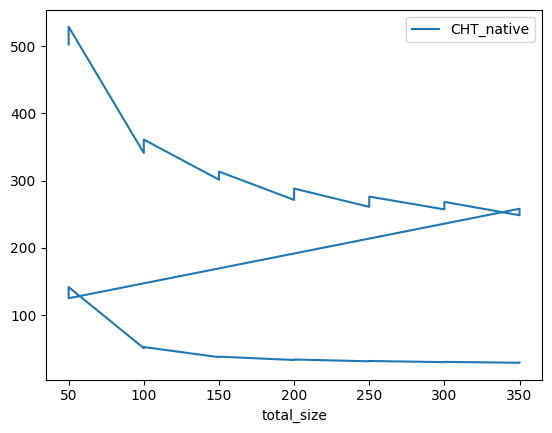

In [16]:
csvf_small.plot(x='total_size',y='throughput')#,category='alg_mode')
alg_cat = csvf_small['alg_mode'].unique()
plt.legend(alg_cat)

In [27]:
y_native

,CHT,CHTfsimd,speedup
0,502.69,528.96,1.052259
1,341.31,361.27,1.058481
2,301.57,313.66,1.040090
3,271.49,288.38,1.062212
4,261.15,276.45,1.058587
5,257.39,268.55,1.043358
6,248.68,258.33,1.038805


In [28]:
y_sgx

,CHT,CHTfsimd,speedup
0,125.26,141.83,1.132285
1,51.01,52.70,1.033131
2,37.59,38.39,1.021282
3,33.40,34.15,1.022455
4,31.46,31.93,1.014940
5,30.24,30.61,1.012235
6,29.27,29.78,1.017424


In [43]:
y_both_mode = y_native.copy()
#y_both_mode = y_both_mode.drop(columns = 'speedup')
#y_both_mode.columns=['CHT_native', 'CHTfsimd_native']
#x_scale_speedup.columns = ["s=8","s=72","s=100","s=200"]
del y_both_mode

In [46]:
y_both_mode = pd.DataFrame()
y_both_mode['CHT_native'] = y_native['CHT']
y_both_mode['CHTfsimd_native'] = y_native['CHTfsimd']
y_both_mode['CHT_sgx'] = y_sgx['CHT']
y_both_mode['CHTfsimd_sgx'] = y_sgx['CHTfsimd']
y_both_mode

,CHT_native,CHTfsimd_native,CHT_sgx,CHTfsimd_sgx
0,502.69,528.96,125.26,141.83
1,341.31,361.27,51.01,52.70
2,301.57,313.66,37.59,38.39
3,271.49,288.38,33.40,34.15
4,261.15,276.45,31.46,31.93
5,257.39,268.55,30.24,30.61
6,248.68,258.33,29.27,29.78


<Axes: >

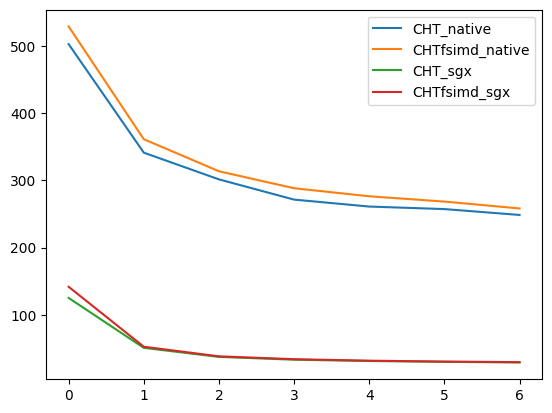

In [48]:
y_both_mode.plot()

Speedup for scaling s (based on cache limits (Exp7))

In [6]:
x_scale_speedup = []
# sgx scale s cht
# r = 0.2
x_simd = [619.79,1539.34,1721.64,1802.19]
x_normal = [609.85,1429.38,1548.11,1605.33]
x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(0,x_tmp)

# sgx scale s cht
# r = 6.4
x_simd = [75.58,276.71,381.27,461.06]
x_normal = [70.37,261.09,363.0,414.58]

x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(1,x_tmp)

# sgx scale s cht
# r = 32
x_simd = [44.51,38.54,38.26,38.05]
x_normal = [41.61,37.51,37.57,37.43]

x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(2,x_tmp)

# sgx scale s cht
# r = 100
x_simd = [32.13,26.47,26.71,26.35]
x_normal = [30.44,25.66,25.91,25.82]
x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(3,x_tmp)
x_scale_speedup

[[1.0162990899401492,
  1.0769284584924932,
  1.1120915180445836,
  1.1226289921698342],
 [1.074037231774904,
  1.0598261136006741,
  1.0503305785123966,
  1.1121134642288582],
 [1.069694784907474,
  1.0274593441748867,
  1.018365717327655,
  1.0165642532727759],
 [1.0555190538764783,
  1.0315666406858923,
  1.030876109610189,
  1.0205267234701783]]

In [7]:
x_scale_speedup = pd.DataFrame(x_scale_speedup)
x_scale_speedup.columns = ["s=8","s=72","s=100","s=200"]
x_scale_speedup["r_size"] = ["0.2","6.4","32","100"]
x_scale_speedup.to_csv("../img/scale-s-output-speedup.csv",float_format='%.3f')
x_scale_speedup

,s=8,s=72,s=100,s=200,r_size
0,1.016299,1.076928,1.112092,1.122629,0.2
1,1.074037,1.059826,1.050331,1.112113,6.4
2,1.069695,1.027459,1.018366,1.016564,32
3,1.055519,1.031567,1.030876,1.020527,100


Speedup for scaling r (based on cache limits (Exp6))

In [8]:
x_scale_speedup = []
# sgx scale r cht
# s = 0.2
x_simd = [41.44,39.78,38.61,29.77]
x_normal = [39.74,36.08,35.32,28.01]
x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(0,x_tmp)

# sgx scale r cht
# s = 6.4
x_simd = [61.76,42.91,40.3,30.63]
x_normal = [57.05,39.53,36.81,29.21]

x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(1,x_tmp)

# sgx scale r cht
# s = 32
x_simd = [142.28,36.06,36.06,28.18]
x_normal = [128.29,34.28,33.95,27.31]

x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(2,x_tmp)

# sgx scale s cht
# r = 100
x_simd = [276.86,35.11,31.93,25.57]
x_normal = [251.25,34.11,30.77,24.92]
x_tmp = []

for i in range(len(x_simd)):
    x_tmp.append(x_simd[i] /x_normal[i])
x_scale_speedup.insert(3,x_tmp)
x_scale_speedup

[[1.042778057372924,
  1.102549889135255,
  1.0931483578708947,
  1.0628347018921813],
 [1.0825591586327783,
  1.085504679989881,
  1.0948111926107034,
  1.0486134885313247],
 [1.1090498090264247,
  1.0519253208868145,
  1.0621502209131075,
  1.0318564628341267],
 [1.1019303482587066,
  1.0293169158604514,
  1.0376990575235618,
  1.026083467094703]]

In [9]:
x_scale_speedup = pd.DataFrame(x_scale_speedup)
x_scale_speedup.columns = ["r=8","r=40","r=72","r=104"]
x_scale_speedup["s_size"] = ["0.2","6.4","32","100"]
x_scale_speedup.to_csv("../img/scale-r-output-speedup.csv",float_format='%.3f')
x_scale_speedup

,r=8,r=40,r=72,r=104,s_size
0,1.042778,1.102550,1.093148,1.062835,0.2
1,1.082559,1.085505,1.094811,1.048613,6.4
2,1.109050,1.051925,1.062150,1.031856,32
3,1.101930,1.029317,1.037699,1.026083,100


Stacked bar plot for exp10 real dataset phases

In [2]:
phases_color_list=['#0671BE', '#e6ab48','#CF8070']
rd_phases = pd.DataFrame()
rd_phases['alg_mode'] = ["RHT_native","PRHO_native","RHT_sgx","PRHO_sgx"]
rd_phases['Partition'] = [387597738/52829996, 387911736.8/52829996, 6571903499.2/52829996, 6515097763.6/52829996]
rd_phases['Join'] = [299195428/52829996, 176570842/52829996, 588546673.2/52829996, 536274905.6/52829996]
#rd_phases["RHT_native"] = [387597738,299195428]
#rd_phases["PRHO_native"] = [387911736.8,176570842]
#rd_phases["RHT_sgx"] = [6571903499.2,588546673.2]
#rd_phases["PRHO_sgx"] = [6515097763.6,536274905.6]
rd_phases

,alg_mode,Partition,Join
0,RHT_native,7.336698,5.663363
1,PRHO_native,7.342642,3.342246
2,RHT_sgx,124.397199,11.140388
3,PRHO_sgx,123.321943,10.150955


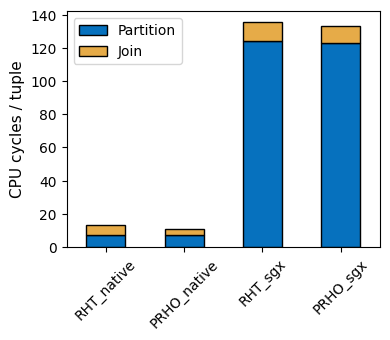

In [33]:
rd_phases.plot(x = 'alg_mode', color=phases_color_list, stacked=True,kind='bar',edgecolor='black',figsize=(4, 3.5))
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("CPU cycles / tuple", fontsize=11)
plt.tight_layout()
plt.savefig('../img/real-dataset-rht-phases.pdf')

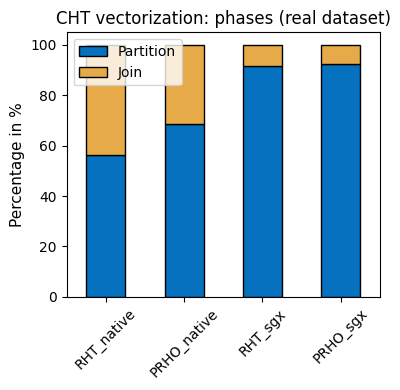

In [30]:
rd_phases_proc = pd.DataFrame()
rd_phases_proc['alg_mode'] = ["RHT_native","PRHO_native","RHT_sgx","PRHO_sgx"]
rd_phases_proc['Partition'] = [387597738/686793200.8*100, 387911736.8/564482614*100, 6571903499.2/7160467098*100, 6515097763.6/7051390120.4*100]
rd_phases_proc['Join'] = [299195428/686793200.8*100, 176570842/564482614*100, 588546673.2/7160467098*100, 536274905.6/7051390120.4*100]
rd_phases_proc.plot(x = 'alg_mode', stacked=True,kind='bar', color=phases_color_list, edgecolor='black',figsize=(4, 4))
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Percentage in %",fontsize=11)
plt.title("CHT vectorization: phases (real dataset)")
plt.tight_layout()
plt.savefig('../img/real-dataset-rht-phases-percentage.pdf')

In [2]:
#Cache fit native (50 MB data from CHT_more_s_phases.csv):
rd_cht_phases = pd.DataFrame()
rd_cht_phases['alg_mode'] = ["CHT_native","simd_native","CHT_sgx","simd_sgx"]
rd_cht_phases['Partition'] = [7036684/6553600, 7050912.4/6553600, 88007366/6553600, 89097337.2/6553600]
rd_cht_phases['Build'] = [6347073.2/6553600, 5964163.2/6553600, 31862098.4/6553600, 19880591.6/6553600]
rd_cht_phases['Probe'] = [30311179.2/6553600, 28522786.8/6553600, 58304389.6/6553600, 49635901.6/6553600]
rd_cht_phases

,alg_mode,Partition,Build,Probe
0,CHT_native,1.073713,0.968487,4.625119
1,simd_native,1.075884,0.910059,4.352232
2,CHT_sgx,13.428858,4.861770,8.896544
3,simd_sgx,13.595175,3.033538,7.573838


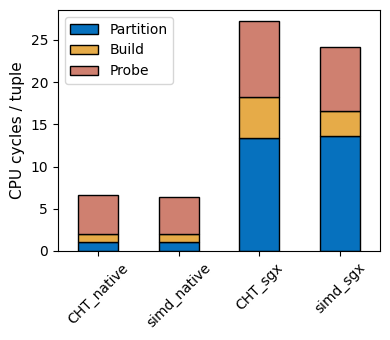

In [35]:
rd_cht_phases.plot(x = 'alg_mode', stacked=True,kind='bar', color=phases_color_list, edgecolor='black',figsize=(4, 3.5))
plt.xticks(rotation=45)
#plt.xlabel("algorithm by modes")
plt.xlabel("")
plt.ylabel("CPU cycles / tuple",fontsize=11)
plt.tight_layout()
plt.savefig('../img/cache-fit-cht-phases.pdf')

In [3]:
rd_cht_phases

,alg_mode,Partition,Build,Probe
0,CHT_native,1.073713,0.968487,4.625119
1,simd_native,1.075884,0.910059,4.352232
2,CHT_sgx,13.428858,4.861770,8.896544
3,simd_sgx,13.595175,3.033538,7.573838


In [4]:
rd_cht_phases_speedup = pd.DataFrame()
rd_cht_phases_speedup['alg_mode'] = ["CHT_native","CHT_sgx"]
rd_cht_phases_speedup['Partition'] = [1.00, 0.99]
rd_cht_phases_speedup['Build'] = [1.06, 1.60]
rd_cht_phases_speedup['Probe'] = [1.06,1.17 ]
rd_cht_phases_speedup

,alg_mode,Partition,Build,Probe
0,CHT_native,1.00,1.06,1.06
1,CHT_sgx,0.99,1.60,1.17


In [ ]:
#Cache fit native percentage:
rd_cht_proc = pd.DataFrame()
rd_cht_proc['alg_mode'] = ["CHT_native","simd_native","CHT_sgx","simd_sgx"]
rd_cht_proc['Partition'] = [7036684/43696067.6, 7050912.4/41539437.6, 88007366/178252430.4, 89097337.2/158675022.4]
rd_cht_proc['Build'] = [6347073.2/43696067.6, 5964163.2/41539437.6, 31862098.4/178252430.4, 19880591.6/158675022.4]
rd_cht_proc['Probe'] = [30311179.2/43696067.6, 28522786.8/41539437.6, 58304389.6/178252430.4, 49635901.6/158675022.4]
rd_cht_proc

,alg_mode,Partition,Build,Probe
0,CHT_native,0.161037,0.145255,0.693682
1,simd_native,0.169740,0.143578,0.686644
2,CHT_sgx,0.493723,0.178747,0.327089
3,simd_sgx,0.561508,0.125291,0.312815


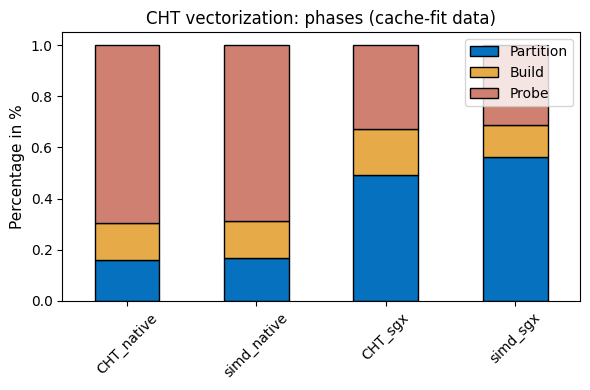

In [25]:
rd_cht_proc.plot(x = 'alg_mode', stacked=True,kind='bar',color=phases_color_list,edgecolor='black',figsize=(6, 4))
plt.xticks(rotation=45)
#plt.xlabel("algorithm by modes")
plt.xlabel("")
plt.ylabel("Percentage in %",fontsize=11)
plt.title("CHT vectorization: phases (cache-fit data)")
plt.tight_layout()
plt.savefig('../img/cache-fit-cht-phases-percentage.pdf')